<a href="https://colab.research.google.com/github/brromeroc/Tareas-Ml/blob/main/Tarea_1%2C_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Solución Tarea 1**

### **1)** Especifique qué problema de Machine Learning está resolviendo.

$\underline{\textit{Solución}}$




Veamos que tipo de datos tenemos, y que intenta solucionar el código

In [2]:
import numpy as np
import pandas as pd
data1=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", sep=",", header=None)

In [3]:
data1

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


Notemos que lo anterior clasifica a los datos en la ultima columna con 0 o 1, luego el problema que debemos resolver corresponde a aprendizaje de máquina supervisado puesto que los vectores de caracteristicas estan etiquetados con 2  posbiles valores.  

Ahora veamos el segundo dataset

In [4]:
import numpy as np
import pandas as pd
import requests, zipfile, io
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))

In [62]:

f3=z.open("datatraining.txt")
data2 = pd.read_csv(f3, sep=",")
data2

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [39]:
f1 = z.open("datatest.txt")
data3 = pd.read_csv(f1, sep=",")
data3

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


Nuevamente  lo anterior clasifica a los datos en la ultima columna con 0 o 1, luego el problema que debemos resolver corresponde a aprendizaje de máquina supervisado puesto que los vectores de caracteristicas estan etiquetados con 2 posbiles valores.

Además el código que se propone en la tarea esta diseñado para clasificar en 2 regiones por medio de SVM, luego nuevamente estamos en aprendizaje de máquina supervisado

Optimized a step.
Optimized a step.
Optimized a step.


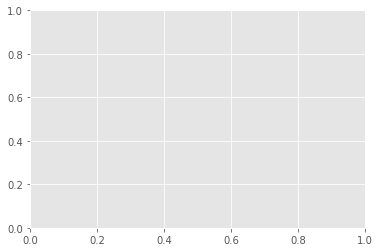

In [6]:
#Código propuesto
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                # Verifiy constraints
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification
        
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm1 = Support_Vector_Machine()
svm1.fit(data_dict)

### **2)** Proporcione un breve resumen de las características y las etiquetas en las que está trabajando.

$\underline{\textit{Solución}}$

En el $\textit{Primer Dataset}$ (https://archive.ics.uci.edu/ml/datasets/banknote+authentication) se tiene una serie de datos que provienen de imagenes que fueron tomadas para la evaluación de un procedimiento de autenticación de billetes, es decir son datos tomados de especimenes de billetes genuinos y falsos. Para determinar el vector de caracteristicas se usó como herramienta la transformada ondícula (Wavelet Transform) que permite extraer caracteristicas de las imagenes tomadas de los distintos billetes.

Para usar esta herramienta se hace uso de la transformada ondícula integral definida como
$$[W_{ψ}f](a,b) = \frac{1}{\sqrt{|a|}} \int_{-∞}^{∞}\overline{ψ\left(\frac{x-b}{a}\right)}f(x)dx$$
donde $ψ \in L^{2}(\mathbb{R})$ es una función llamada ondícula ortonormal (orthonormal wavelet) que es usada para definir una base de Hilbert, que es un sistema completo ortonormal, para el espacio de Hilbert $L^{2}(\mathbb{R})$ de las funciones cuadrado integrables.

Las caracteristicas que definen cada una de las componentes del vector de caracteristicas son las siguientes:

- Primera componente: Diferencia de la imagen transformada ondícula (Wavelet Transformed image) - (continua)
- Segunda componente: Asimetría de la imagen transformada ondícula (Wavelet Transformed image) - (continua)
- Tercera componente: Curtosis de la imagen transformada ondícula (Wavelet Transformed image) - (continua)
- Cuarta componente: Entropía de la imagen - (continua)
- Quinta componente: Clase - (número entero 0 si es falso o 1 si es real)


En el $\textit{Segundo Dataset}$ (https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+) se tiene una serie de datos que establecen la ocupación de la tierra de fotos con sello de tiempo que fueron tomadas cada minuto. Estos datos experimentales fueron usados para clasificación binaria (ocupación de una habitación).

Las caracteristicas que definen cada una de las componentes del vector de caracteristicas son las siguientes:

- Primera componente: Fecha y hora (año-mes-día hora:minutos:segundos)
- Segunda componente: Temperatura en Celsius
- Tercera componente: Humedad relativa (Porcentaje - %)
- Cuarta componente: Luz en Lux
- Quinta componente: CO2 en ppm (Partes por millón)
- Sexta componente: Tasa de humedad, cantidad derivada de la temperatura y la humedad relativa en $\frac{[kg(vapor \; de \; agua)]}{[kg(aire)]}$
- Septima componente: Ocupación, 0 ó 1, 0 para no ocupado y 1 para el estado de ocupado.

### **3)**  Responda las siguientes preguntas

$\underline{\textit{Solución}}$

**a)** ¿Son estos conjuntos de datos linealmente separables?



Ahora vamos a solucionar este es el mejor programaaaa

**b)** ¿Se eligen estos conjuntos de datos al azar?

**c)** El tamaño de la muestra es suficiente para garantizar la generalización.

### **4)**   Proporcione una explicación de cómo y por qué funciona el código. Puede agregar comentarios y/o explicaciones formales en el cuaderno.

$\underline{\textit {Solución}}$

Acontinuación se muestra el código con las explicaciones de cada definicion de la clase.

Optimized a step.
Optimized a step.
Optimized a step.


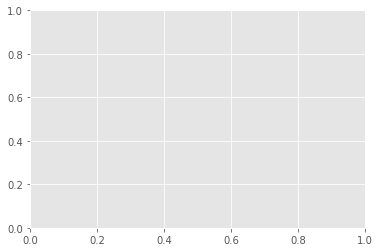

In [7]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        # La subclase llama los datos para utilizarlos
        self.data = data
        # { ||w||: [w,b] }
        # El diccionario va a almacenar las parejas [w,b] etiquetadas por la norma de w (||w||) tales que satisfagan que yi(xi.w+b) >= 1
        
        opt_dict = {}

        # El vector de vectores llamado transforms va a ser utilizado para evaluar todas las posibles direcciones que puede tomar un vector w dado. De esta manera, se
        # examinan todas las posibles lineas determinadas por un vector de entrada w.
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        # Se crea temporalmente un arreglo para buscar el número máximo entre todos los datos para usar este valor como un parametro que determine los rangos de operación
        # de todo el programa, así como para fijar cual va a ser el vector w inicial en el programa.
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        # Se determina cual es el valor más pequeño y más grande de todos los datos y despues se vacia el arreglo "all_data" para no ocupar una gran cantidad de memoria.
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        
        # En esta parte se establecen los pasos en los cuales se va a ir variando el vector w para el proceso de optimización.
        # Inicialmente se dan pasos "grandes" hasta llegar a un punto en donde el vector w(i+1) supere al vector w(i) y despues se sigue la iteración con los pasos más pequeños.

        # Esta estrategia de usar pasos que varien el vector w es funcional porque el problema de minimizar la norma de w es un problema de optimización convexa en el cual se sabe
        # que existe un mínimo global de la función
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive

        # En esta parte se establecen las variables que definiran el rango donde variará el escalar b para determinar si cierta escogencia de w 
        # cumple que yi(xi.w+b) >= 1 para todos los datos.

        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w

        # Aquí no es necesario tener la misma precisión de la escogencia de b a diferencia de como se escoge w puesto que el valor de b no tiene muchas restricciones 
        # en la condición yi(xi.w+b) >= 1 lo cual permite ahorrar tiempo de computo. Sin embargo, se desea en la medida de lo posible que para los datos de entrenamiento
        # los valores de b esten sujetos a la condición de frontera yi(xi.w+b) = 1
        b_multiple = 5
        latest_optimum = self.max_feature_value*10 #Este valor sera el que determinara todas las componentes del vector w inicial y en las iteraciones posteriores se ira cambiando

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            # Esta escogencia permite ahorrar tiempo de computo y es razonable puesto que el problema es de optimización convexa.
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                  # En esta parte del código se evalua para cada w los posibles b que puedan satisfacer la restricción yi(xi.w+b) >= 1

                    for transformation in transforms:
                        w_t = w*transformation
                        # Aquí se evalua cada una de las posibles direcciones que puede tomar w
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                # Verifiy constraints
                                # En esta parte se determina si la escogencia particular de w y b satisfacen la restricción yi(xi.w+b) >= 1
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm
                            # Una vez encontrada una pareja [w,b] para la cual se satisface la restricción yi(xi.w+b) >= 1, se procede a guardarla en un diccionario
                            # etiquetado por la norma de w para despues poder hacer la busqueda y escoger el w con norma más pequeña
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                # En esta parte se determina cuando el programa llega al final de aplicar la serie de pasos mirando cuando la primera componente del vector w cambia de signo
                # en este caso no importa que componente se mira, porque todas estan definidas igual.
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            # En esta última parte se ordena el diccionario "opt_dict" de tal forma que la primera entrada sea el [w,b] donde w tiene la menor norma (min||w||)
            # y apartir de ahí escoger el nuevo w que va ir cambiando con pasos más pequeños y así ir mejorando la escogencia de w.
            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
    # En esta parte se desarrolla la predicción para un conjunto de datos de prueba. Para hacer la clasificación se mira la función sign( x.w+b )
    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification
        
# Este es el diccionario que contiene todos los datos de entrenamiento, clasificados por -1 si no tiene la caracteristica en estudio y 1 si tiene la caracteristica en estudio      
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

# Aquí se llama a la clase Support_Vector_Machine() como svm1
svm1 = Support_Vector_Machine()

# Aquí se ejecuta la subclase de entrenamiento de la clase svm1 usando los datos de entrenamiento definidos en el diccionario "data_dict"
svm1.fit(data_dict)

### **5)** Muestre algunos ejemplos para ilustrar que el método está funcionando correctamente.

$\underline{\textit {Solución}}$


El primer ejemplo que utlizaremos es el de entranar el algoritmo  con los siguientes datos: 

$$A_1=[1,7],A_2=[2,8],A_3=[3,8]\hspace{6mm} R_1=[5,1],R_2=[6,-1],R_3=[7,3]$$

Optimized a step.
Optimized a step.
Optimized a step.
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


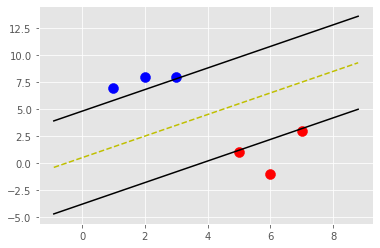

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

        
        
        # extremely expensive
        b_range_multiple = 2
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)
svm.visualize()





Ahora con lo anterior,  ulizando la clase  $\texttt{svm.predict}$, veamos como con nuevos datos, este predice donde los debe ubicar, para ello utlizaremos los puntos: 


$p_1=[0,10]\\
p_2=[1,3]\\
p_3=[3,4]\\
p_4=[3,5]\\
p_5=[5,5]\\
p_6=[5,6]\\
p_7=[6,-5]\\
p_8=[5,8]$

Optimized a step.
Optimized a step.
Optimized a step.
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


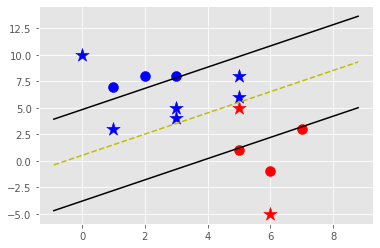

In [9]:

data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()


### **6)** Proporcionar evidencia cuantitativa para la generalización utilizando el conjunto de datos proporcionado.

$\underline{\textit{Solución}}$

Primero utilizemos el primer dataset para ver si podemos generalizar sobre algunos datos, para ello vamos a tomar 60% de estos datos como entranamiento, y el restante  40% los vamos a predecir.

In [59]:
import numpy as np


class SVM:

    def __init__(self, C = 1.0):
        # C = Termino de error
        self.C = C
        self.w = 0
        self.b = 0

    # Función de Pérdida / Cálculo
    def hingeloss(self, w, b, x, y):
        # Termino de Regularización
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Termino de Optimización
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculando perdida
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # Numero de cararcteristicas en X
        number_of_features = X.shape[1]

        # Numero de ejemplo en X
        number_of_samples = X.shape[0]

        c = self.C

        # Creando ids de 0 a number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Barajar las muestras al azar
        np.random.shuffle(ids)

        # creando una matriz de ceros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Lógica de descenso de gradiente
        for i in range(epochs):
            # Cálculo de la pérdida de bisagra
            l = self.hingeloss(w, b, X, Y)

            #Anexando todas las pérdidas
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)

In [11]:
data1

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [28]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



Xd = data1.iloc[0:1096,0:4]     #Con estos datos entrenaremos al algoritmo (tomamos el 80% de ellos )
yd=data1.iloc[0:1096,4:5]
X=data1.to_numpy()
Xt= Xd.to_numpy()
yt= yd.to_numpy()
yt = np.where(yt == 0, -1, 1)
Xej= X[1096:1371, 0:4]
Yej=X[1096:1371, 4:5]


In [49]:
from numpy.core.fromnumeric import size
size(yt,0)

1096

In [50]:
size(Xt,0)

1096

In [60]:

svm = SVM()

w, b, losses = svm.fit(Xt, yt)

prediction = svm.predict(Xej)

# Loss value
lss = losses.pop()

print("Loss:", lss)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, Yej))
print("w, b:", [w, b])

Loss: 0.5442203698297309
Prediction: [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  

Ahora vamos hacer lo mismo pero  con el $\textit{Segundo dataset}$

In [70]:
Xd2 = data2.iloc[0:140,0:6]     
yd2=data2.iloc[0:140,6:7]
X2=data2.to_numpy()
Xt2= Xd2.to_numpy()
yt2= yd2.to_numpy()
yt2 = np.where(yt2 == 0, -1, 1)
Xej2= X2[8000:8143, 0:6]
Yej2=X2[8000:8143, 6:7]

### **Referencias** 



1.   The HundredPage Machine Learning,Andriy Burkov, 2019. 
2.   Support Vector Machine Optimization in Python, https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
3.  Visualization and Predicting with our Custom SVM: https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/?completed=/svm-optimization-python-2-machine-learning-tutorial/

